## KNN Mnist

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import struct

## Load Images and labels

In [3]:
def load_images(file_name):
    ##   在读取或写入一个文件之前，你必须使用 Python 内置open()函数来打开它。##
    ##   file object = open(file_name [, access_mode][, buffering])          ##
    ##   file_name是包含您要访问的文件名的字符串值。                         ##
    ##   access_mode指定该文件已被打开，即读，写，追加等方式。               ##
    ##   0表示不使用缓冲，1表示在访问一个文件时进行缓冲。                    ##
    ##   这里rb表示只能以二进制读取的方式打开一个文件                        ##
    binfile = open(file_name, 'rb') 
    ##   从一个打开的文件读取数据
    buffers = binfile.read()
    ##   读取image文件前4个整型数字
    magic,num,rows,cols = struct.unpack_from('>IIII',buffers, 0)
    ##   整个images数据大小为60000*28*28
    bits = num * rows * cols
    ##   读取images数据
    images = struct.unpack_from('>' + str(bits) + 'B', buffers, struct.calcsize('>IIII'))
    ##   关闭文件
    binfile.close()
    ##   转换为[60000,784]型数组
    images = np.reshape(images, [num, rows * cols])
    return images

In [4]:
def load_labels(file_name):
    ##   打开文件
    binfile = open(file_name, 'rb')
    ##   从一个打开的文件读取数据    
    buffers = binfile.read()
    ##   读取label文件前2个整形数字，label的长度为num
    magic,num = struct.unpack_from('>II', buffers, 0) 
    ##   读取labels数据
    labels = struct.unpack_from('>' + str(num) + "B", buffers, struct.calcsize('>II'))
    ##   关闭文件
    binfile.close()
    ##   转换为一维数组
    labels = np.reshape(labels, [num])
    return labels   

In [5]:
filename_train_images = './Mnist/train-images.idx3-ubyte'
filename_train_labels = './Mnist/train-labels.idx1-ubyte'
filename_test_images = './Mnist/t10k-images.idx3-ubyte'
filename_test_labels = './Mnist/t10k-labels.idx1-ubyte'
train_images=load_images(filename_train_images)
train_labels=load_labels(filename_train_labels)
test_images=load_images(filename_test_images)
test_labels=load_labels(filename_test_labels)
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


## Display Image

In [6]:
train_images[0, :] 

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [20]:
def draw_image(image_array):
    image_array = image_array.reshape(28, 28)
    plt.imshow(image_array, cmap='Greys')
    plt.show()
    
one_image = train_images[1, :]

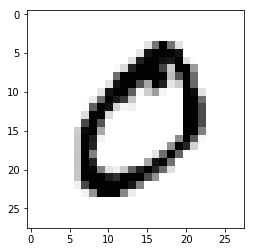

0


In [22]:
draw_image(one_image)
print(train_labels[1])

## KNN

In [13]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=10,
    algorithm = 'auto'
)

In [14]:
knn.fit(train_images, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [17]:
knn_predict = knn.predict(test_images)

In [16]:
# print(knn_predict)

[7]


In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(knn_predict, test_labels)

0.9665

## DCTree 

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1000)
tree.fit(train_images, train_labels)

0.8776

In [25]:
tree_predict = tree.predict(test_images)
accuracy_score(test_labels, tree_predict)

0.8776

## KNN-Grid-Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe = Pipeline(
[('scaler', StandardScaler()),
('knn', KNeighborsClassifier(n_jobs=-1))]
)
knn_params = {'knn__n_neighbors': range(1, 30)}
knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=5, n_jobs=-1,
                        verbose=True)

knn_grid.fit(train_images, train_labels)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 29 candidates, totalling 145 fits
